# Data Engineering Capstone Project- Data Architecture Design and  Transition to AWS


## Introduction
The goal of this project is to solve a business problem. We will design the data architecture for a small private clinic. 

This is a fictional healthcare clinic.

* Name: UnicornHealth
* Scope: Local
* Patients: 500
* Employees: 25
* Kind of practice: Family Practice 

In order to do design the data architecture, we need to understand the problem. After this, we will design a business process diagram to visualize the business model. Then, we will look at all relevant data and finally, we will understand how all the data relates. We will transition the business to a cloud environment to automize the data process.

Lets visualize the basic business model:

We used <a href="https://www.lucidchart.com/">lucidchart</a> to make the
<a href="https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/cc9a792fb3eef2f2769fa33d27740198f9f4228a/PrivateClinicProcessFlow.jpeg">business model diagram</a>.



### Schematic Presentation of Data Structure

The business model diagram, helped with the visualization of the basic business process of UnicornHealth. Next, we will determine the basic Data Structure by identifying the main elements, which are <b>patient</b>, <b>appointment</b>, <b>encounter</b> and <b>employee</b> . We also generated mock data related to billing and insurance . The attributes for each element are being also identified.  Finally, we will proceed to identify the connections between the entities.



## DATA CREATION PROCESS

### Database creation
We used a <a href ="https://www.mockaroo.com/"> mock data generator</a> to generate fake but realistic data. Open <a href ="https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/cc9a792fb3eef2f2769fa33d27740198f9f4228a/MockTableCreation.pdf">this file</a> to get an idea of the conditions we established to generate the data.

We loaded CSV files directly into our test environment which in our case was MySql Workbench.

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/account%20(3).csv">account.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/7cbff859b75f6ff43d449cc0c9e06a7b6a751d44/employee.csv">employee.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/appointment.csv">appointment.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/encounter%20(1).csv">encounter.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/insurance.csv">insurance.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/paient500.csv">patient.csv file</a>


### Determination of foreign and primary keys 

Each table has a primary key, which is unique in the dataset.

The foreign and primary keys (unique keys) are being identified and highlighted in the diagram below. 


### Data Definition Language (DDL)

We especified the storage groups to be used. We defined the datatype, primary keys and foreign keys in Mysql Workbench. Varchar was the datatype we chose for most of the columns.


###  Enhanced entity-relationship (EER)

This model is helpful as a tool to plan the database and visualize the relationships among the tables.

![https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/01969afe2190b58496598fa6a75c9f1490df15da/CapstoneEER.png]

### Database Migration to RDS

To migrate the database to AWS RDS we needed to, first create a database using Easy Create, MySQL, Free Tier engine in RDS

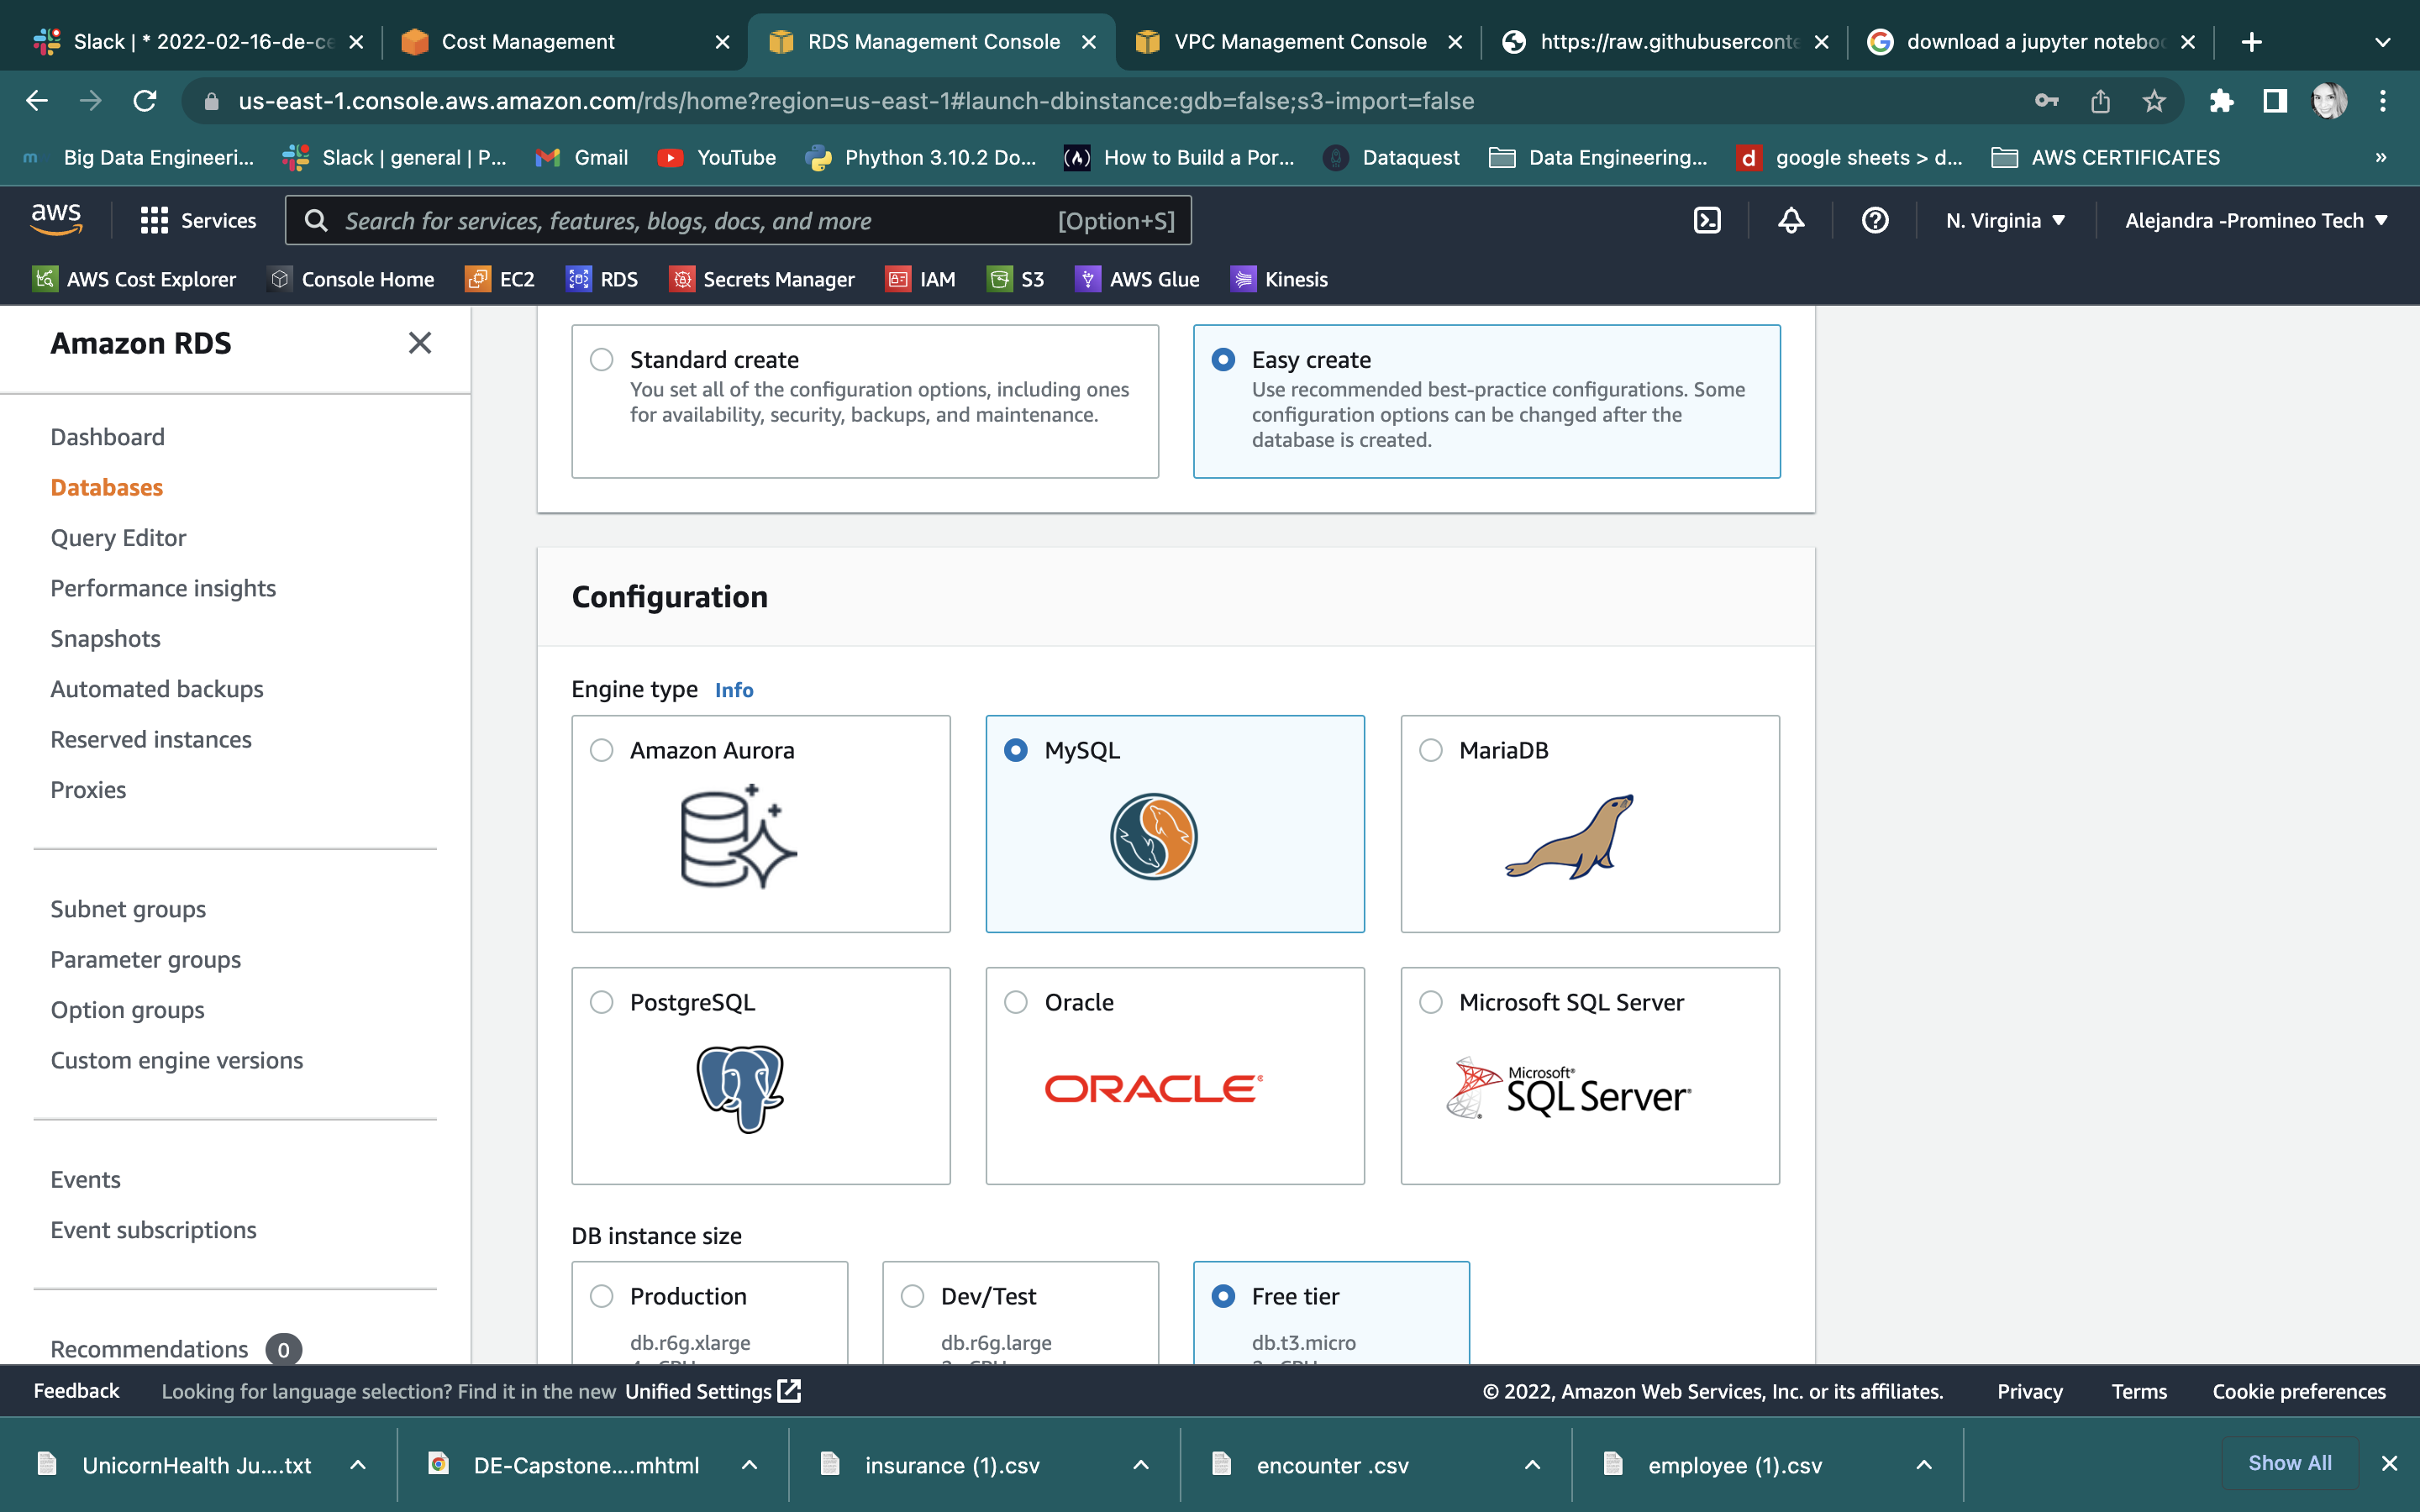


Second, we went to MySQL workbench to establish a connection from local port to the endpoint of the AWS RDS database we just created

![https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/935b2ee4b7ba4907fdc735dabb3b455c7ddd1f5a/MySQL-RDSconnection.png]



Third, we tested the connection, and it failed the first time. It was necessary to alter the inbound rules to the Security Group in our database AWS RDS to allow traffic from MySQL port 3306 as shown in the image below

insert image RDSinbound
![https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/935b2ee4b7ba4907fdc735dabb3b455c7ddd1f5a/RDSinbound.png]

We queried the data using Python. Most of the code found in https://www.w3schools.com/

In [1]:
## Query data from MySQL database in Python

import mysql.connector ##<--or any mysql-python library

mydb = mysql.connector.connect(
    host="rdsunicorn.chd82pgi4wn1.us-east-1.rds.amazonaws.com",  ##<-endpoint to your database
    user="admin",  ##,<-- user name in AWS RDS database
    password="Capstone22",   ##<-- database password
    database="unicornDB"   ##<-- name of the database (NOT THE IDENTIFIER!)
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM patient")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

(0, 'PER1', 'Pansie', 'Kitson', 'pansie.kitson@seesaa.net', '5/6/1965', '7 Shelley Avenue', 55442, 'INS1')
(1, 'PER2', 'Tomi', 'Ancliff', 'tomi.ancliff@disqus.com', '12/19/2004', '34 Logan Road', 55440, 'INS4')
(2, 'PER3', 'Daune', 'Kelsell', 'daune.kelsell@meetup.com', '1/15/1956', '41681 Lukken Terrace', 55440, 'INS3')
(3, 'PER4', 'Devinne', 'Bygate', 'devinne.bygate@ed.gov', '2/27/1974', '31665 Declaration Park', 55441, 'INS2')
(4, 'PER5', 'Bert', 'Brazear', 'bert.brazear@harvard.edu', '6/5/1968', '75 Merrick Parkway', 55441, 'INS5')
(5, 'PER6', 'Randolph', 'Truran', 'randolph.truran@tuttocitta.it', '8/5/1970', '9737 Sheridan Court', 55448, 'INS3')
(6, 'PER7', 'Avigdor', 'Dyton', 'avigdor.dyton@dedecms.com', '5/18/2016', '59 Hoepker Court', 55448, 'INS5')
(7, 'PER8', 'Iris', 'Jonsson', 'iris.jonsson@illinois.edu', '12/27/1954', '66 Daystar Junction', 55449, 'INS1')
(8, 'PER9', 'Donnell', 'Guess', 'donnell.guess@xing.com', '4/8/1990', '2790 Del Mar Alley', 55446, 'INS4')
(9, 'PER10',

We need to format the query into a list of dictionaries for each row. In this case, we are showing the 'patient' table.

In [2]:
# Querying MySQL RDS columns in a table into a list of dictionaries

import boto3
import mysql.connector
import json

cnx = mysql.connector.connect(user='admin', password='Capstone22',  ##<--- user, password
host='rdsunicorn.chd82pgi4wn1.us-east-1.rds.amazonaws.com', ## <-- endpoint database
                              database='unicornDB')  ##<--<database>

query = "SELECT * FROM patient;"

cur = cnx.cursor()
results = cur.execute(query)
rows = cur.fetchall()

# Formatting the Query into a list of dictionaries for each row. In this case my table called Employees
# has 6 columns EmployeeId, Name, Position, WeeklyHours, SupervisorId, and WorkloadPerHour
Rows_lst = []
for i in rows:
    i_dict = {'person_id': i[0], 'first_name': i[1],
              'last_name': i[2], 'email': i[3],
              'dob': i[4], 'address': i[5], 'zip':i[6], 'insurance': i[7] }
    Rows_lst.append(i_dict)

print(i_dict)   

{'person_id': 9, 'first_name': 'PER10', 'last_name': 'Rubie', 'email': 'Ineson', 'dob': 'rubie.ineson@yale.edu', 'address': '10/5/1974', 'zip': '8981 Monica Lane', 'insurance': 55446}
